In [7]:
!pwd

/c/Users/sadasivan evan/Pandas_Homework_Sadasivan


In [8]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

In [9]:
# Reading whale returns
Whale_csv_path = Path("whale_returns.csv")
Whale_df = pd.read_csv(Whale_csv_path, index_col = "Date", parse_dates= True, infer_datetime_format=True)

In [10]:
Whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [11]:
# Count nulls
Whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [12]:
Whale_df.dropna(inplace=True)
Whale_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [13]:
Whale_df.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [14]:
# Reading algorithmic returns
Algo_csv_path = Path("algo_returns.csv")
Algo_df = pd.read_csv(Algo_csv_path, index_col = "Date", parse_dates= True, infer_datetime_format=True)

In [15]:
# Count nulls
Algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [16]:
Algo_df.dropna(inplace=True)
Algo_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [17]:
Algo_df.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

In [18]:
# Reading S&P 500 Closing Prices
sp500_csv_path = Path("sp500_history.csv")
sp500_df = pd.read_csv(sp500_csv_path, index_col = "Date", parse_dates= True, infer_datetime_format=True)

In [19]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [20]:
sp500_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [21]:
sp500_df['Close'] = sp500_df['Close'].str.replace('$', '')
sp500_df['Close']

C:\Users\sadasivan evan\AppData\Local\Temp\ipykernel_17248\586156801.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_df['Close'] = sp500_df['Close'].str.replace('$', '')


Date
2019-04-23    2933.68
2019-04-22    2907.97
2019-04-18    2905.03
2019-04-17    2900.45
2019-04-16    2907.06
               ...   
2012-10-05    1460.93
2012-10-04    1461.40
2012-10-03    1450.99
2012-10-02    1445.75
2012-10-01    1444.49
Name: Close, Length: 1649, dtype: object

In [23]:
sp500_df['Close'] = sp500_df['Close'].astype('float')

In [24]:
daily_returns = sp500_df.pct_change()

In [25]:
daily_returns.dropna(inplace=True)

In [26]:
daily_returns.columns=['Sp500_close']

sp500_df.head()

In [27]:
daily_returns

,Sp500_close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [28]:
combined_df = pd.concat([Whale_df, Algo_df, daily_returns], axis="columns", join="inner")

In [29]:
combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Sp500_close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


combined_df.plot()

<AxesSubplot:xlabel='Date'>

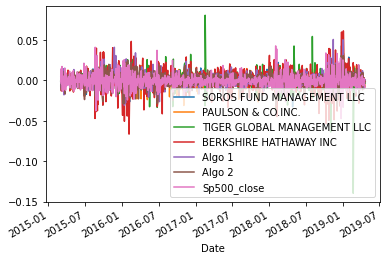

In [30]:
combined_df.plot()

In [31]:
cumsum=combined_df.cumsum()

In [32]:
cumsum

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Sp500_close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.000964,-0.001739,-0.003030,-0.002356,-0.010531,0.001467,0.003213
2015-03-05,0.004980,0.002337,-0.000675,0.004371,-0.011486,0.005790,0.017591
2015-03-06,-0.002925,-0.001237,-0.009156,-0.008727,-0.016443,-0.005670,0.013662
2015-03-09,-0.002343,0.002988,-0.003313,-0.010380,-0.021890,-0.004367,0.030916
...,...,...,...,...,...,...,...
2019-04-15,0.179058,-0.214431,-0.084823,0.509621,0.702434,0.270675,-0.283222
2019-04-16,0.181758,-0.214043,-0.085654,0.510458,0.695489,0.273574,-0.280943
2019-04-17,0.178861,-0.220510,-0.090063,0.513680,0.685188,0.268346,-0.282520


<AxesSubplot:xlabel='Date'>

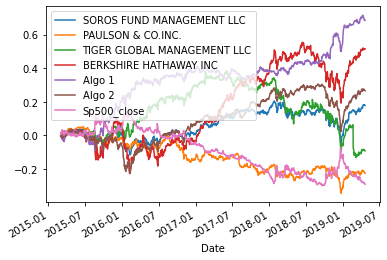

In [33]:
cumsum.plot()

<AxesSubplot:>

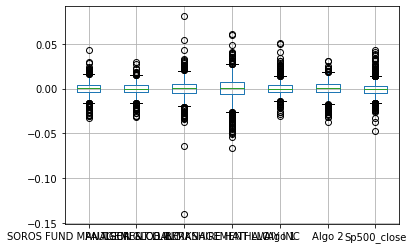

In [34]:
combined_df.boxplot()

In [35]:
combined_df.std()

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
Sp500_close                    0.008587
dtype: float64

In [36]:
Algo1_std = combined_df["Algo 1"].std()
print(Algo1_std)

0.007622690854822048


In [37]:
import math
combined_df.std()*math.sqrt(250)

SOROS FUND MANAGEMENT LLC      0.124850
PAULSON & CO.INC.              0.111083
TIGER GLOBAL MANAGEMENT LLC    0.172302
BERKSHIRE HATHAWAY INC         0.204263
Algo 1                         0.120525
Algo 2                         0.131886
Sp500_close                    0.135771
dtype: float64

<AxesSubplot:xlabel='Date'>

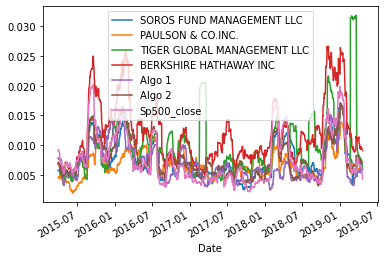

In [38]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_df.rolling(window=21).std().plot()

# Plot the rolling standard deviation

<AxesSubplot:>

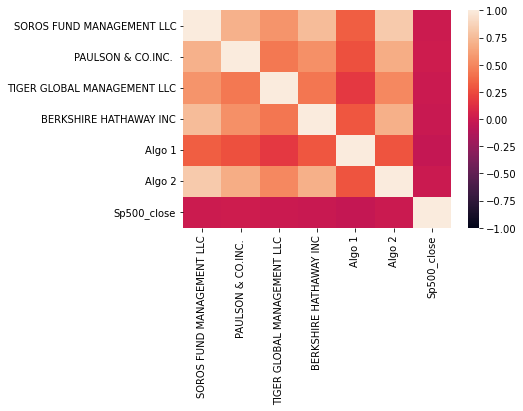

In [39]:
# Calculate the correlation
close_correlation = combined_df.corr()

# Display de correlation matrix
import seaborn as sns
sns.heatmap(close_correlation, vmin=-1, vmax=1)

<AxesSubplot:title={'center':'Rolling 30-Day Beta of Algo 1'}, xlabel='Date'>

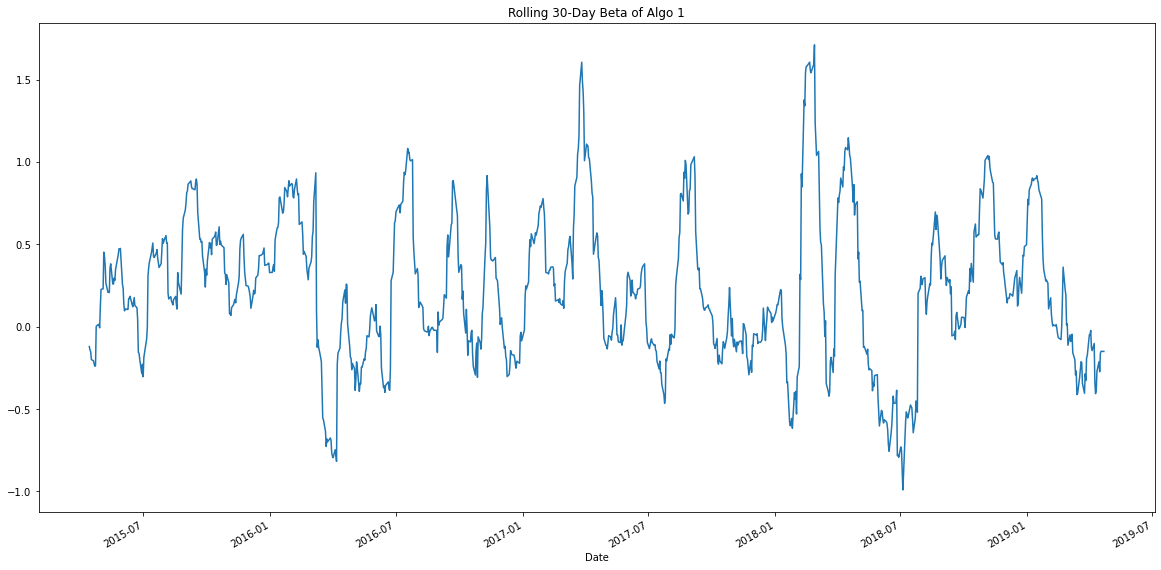

In [75]:
# Calculate covariance of a single portfolio
Close_covariance = combined_df['Algo 1'].cov(combined_df['Sp500_close'])

# Calculate variance of S&P 500
variance = combined_df['Algo 1'].var()
# Computing beta
algo1_beta = Close_covariance / variance

# Plot beta trend
rolling_Algo1_covariance = combined_df['Algo 1'].rolling(window=21).cov(combined_df['Algo 2'])
rolling_variance_Algo1 = combined_df['Algo 1'].rolling(window=30).var()

rolling_beta_Algo1 = rolling_Algo1_covariance / rolling_variance_Algo1
rolling_beta_Algo1.plot(figsize=(20, 10), title='Rolling 30-Day Beta of Algo 1')

In [41]:
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
Sp500_close                   -0.518582
dtype: float64

In [37]:
# Create custom Portfolio

In [42]:
appl_path = Path("aapl_historical.csv")
appl_df = pd.read_csv(appl_path, index_col = "Trade DATE", parse_dates= True, infer_datetime_format=True)


In [43]:
goog_path = Path("goog_historical.csv")
goog_df = pd.read_csv(goog_path, index_col = "Trade DATE", parse_dates= True, infer_datetime_format=True)


In [44]:
cost_path = Path("cost_historical.csv")
cost_df = pd.read_csv(cost_path, index_col = "Trade DATE", parse_dates= True, infer_datetime_format=True)

In [45]:
combined_portfolio = pd.concat([cost_df, goog_df, appl_df], axis="columns", join="inner")

In [46]:
combined_portfolio

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2019-05-09,COST,243.47,GOOG,1162.38,AAPL,200.72
2019-05-08,COST,241.34,GOOG,1166.27,AAPL,202.90
2019-05-07,COST,240.18,GOOG,1174.10,AAPL,202.86
2019-05-06,COST,244.23,GOOG,1189.39,AAPL,208.48
2019-05-03,COST,244.62,GOOG,1185.40,AAPL,211.75
...,...,...,...,...,...,...
2018-05-17,COST,199.60,GOOG,1078.59,AAPL,186.99
2018-05-16,COST,198.71,GOOG,1081.77,AAPL,188.18
2018-05-15,COST,195.48,GOOG,1079.23,AAPL,186.44


In [47]:
combined_portfolio.columns=['COST_Symbol', 'COST_Close', 'GOOG_Symbol', 'GOOG_Close', 'appl_symbol', 'APPL_Close']

In [48]:
combined_portfolio

,COST_Symbol,COST_Close,GOOG_Symbol,GOOG_Close,appl_symbol,APPL_Close
Trade DATE,,,,,,
2019-05-09,COST,243.47,GOOG,1162.38,AAPL,200.72
2019-05-08,COST,241.34,GOOG,1166.27,AAPL,202.90
2019-05-07,COST,240.18,GOOG,1174.10,AAPL,202.86
2019-05-06,COST,244.23,GOOG,1189.39,AAPL,208.48
2019-05-03,COST,244.62,GOOG,1185.40,AAPL,211.75
...,...,...,...,...,...,...
2018-05-17,COST,199.60,GOOG,1078.59,AAPL,186.99
2018-05-16,COST,198.71,GOOG,1081.77,AAPL,188.18
2018-05-15,COST,195.48,GOOG,1079.23,AAPL,186.44


In [49]:
combined_portfolio=combined_portfolio.drop(columns=['COST_Symbol', 'GOOG_Symbol', 'appl_symbol'])

In [50]:
combined_portfolio_returns = combined_portfolio.pct_change()

In [51]:
combined_portfolio_returns.dtypes

COST_Close    float64
GOOG_Close    float64
APPL_Close    float64
dtype: object

In [52]:
combined_portfolio_returns.dropna(inplace=True)

In [53]:
combined_portfolio_returns['my_portfolio_mean'] = combined_portfolio_returns.mean(axis=1)

In [55]:
combined_portfolio_returns=combined_portfolio_returns.drop(columns=['COST_Close', 'GOOG_Close','APPL_Close'])

In [56]:
final_df = pd.concat([combined_df,combined_portfolio_returns], axis="columns", join="inner")

In [63]:
final_df.dropna(inplace=True)

In [64]:
final_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Sp500_close,my_portfolio_mean
2018-05-11,-0.004717,0.000982,0.002624,-0.004125,0.000358,0.000281,-0.000883,-0.000012
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,0.010216
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,-0.009283
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,0.001618
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,0.006112
...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,-0.000326
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,-0.009149
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,-0.001541
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011,-0.001148


In [65]:
final_df.std()*math.sqrt(250)

SOROS FUND MANAGEMENT LLC      0.146006
PAULSON & CO.INC.              0.116219
TIGER GLOBAL MANAGEMENT LLC    0.231509
BERKSHIRE HATHAWAY INC         0.245838
Algo 1                         0.133114
Algo 2                         0.138650
Sp500_close                    0.151542
my_portfolio_mean              0.212290
dtype: float64

<AxesSubplot:>

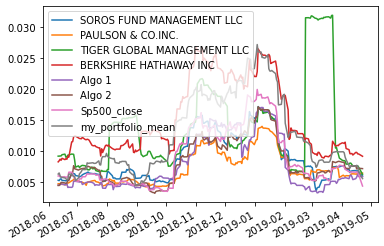

In [66]:
final_df.rolling(window=21).std().plot()

In [67]:
final_correlation = final_df.corr()

<AxesSubplot:>

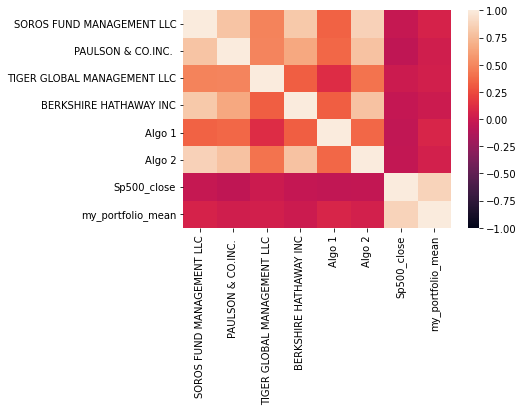

In [71]:
sns.heatmap(final_correlation, vmin=-1, vmax=1)

In [73]:
#Calculate Covariance
final_covariance = final_df['my_portfolio_mean'].cov(combined_df['Sp500_close'])

#Calculate variance of S&P 500
final_variance = final_df['my_portfolio_mean'].var()

# Computing beta
my_portfolio_beta = final_covariance / final_variance

# Plot beta trend
rolling_covariance_my_portfolio = final_df['my_portfolio_mean'].rolling(window=30).cov(final_df['Sp500_close'])
rolling_variance_my_portfolio = final_df['my_portfolio_mean'].rolling(window=30).var()

rolling_beta_my_portfolio = rolling_covariance_my_portfolio / rolling_variance_my_portfolio
rolling_beta_my_portfolio.plot(figsize=(20, 10), title='Rolling 30-Day Beta of My Portfolio')

<AxesSubplot:title={'center':'Rolling 30-Day Beta of My Portfolio'}>

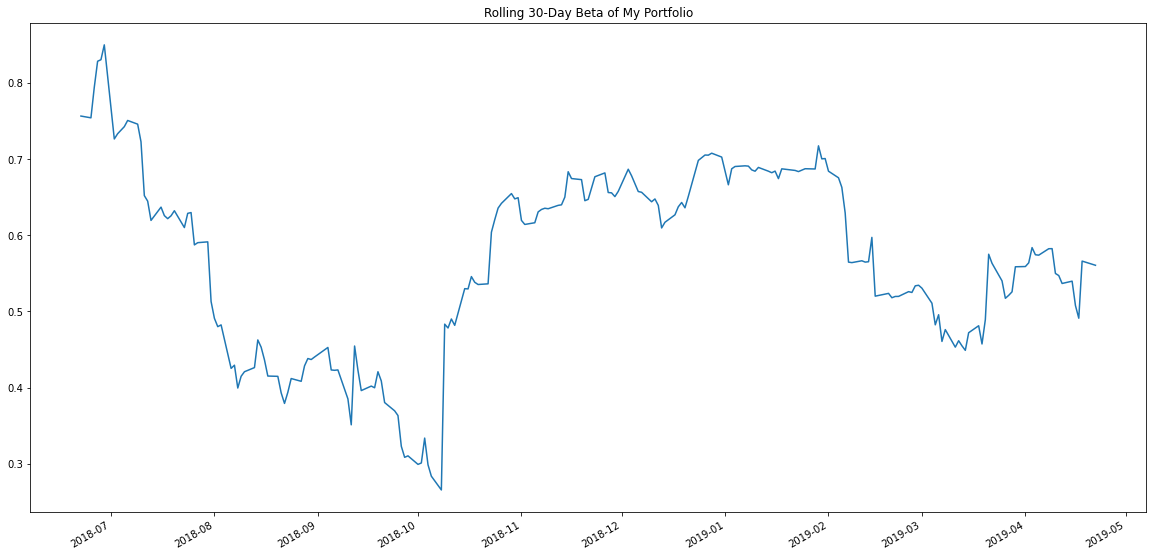

In [74]:
# Computing beta
my_portfolio_beta = final_covariance / final_variance

# Plot beta trend
rolling_covariance_my_portfolio = final_df['my_portfolio_mean'].rolling(window=30).cov(final_df['Sp500_close'])
rolling_variance_my_portfolio = final_df['my_portfolio_mean'].rolling(window=30).var()

rolling_beta_my_portfolio = rolling_covariance_my_portfolio / rolling_variance_my_portfolio
rolling_beta_my_portfolio.plot(figsize=(20, 10), title='Rolling 30-Day Beta of My Portfolio')

In [78]:
# Calculate Annualized Sharpe Ratios
Final_sharpe_ratios = (final_df.mean() * 252) / (final_df.std() * np.sqrt(252))
Final_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.344766
PAULSON & CO.INC.              0.236041
TIGER GLOBAL MANAGEMENT LLC   -1.052249
BERKSHIRE HATHAWAY INC         0.085005
Algo 1                         1.999866
Algo 2                         0.009467
Sp500_close                   -0.432942
my_portfolio_mean             -0.613547
dtype: float64

In [82]:
print("My portfolio as well as the sp500 had a negative Sharpe ratio, which makes it difficult to evaluate the relative riskiness. My portfolio has a higher standard deviation which makes it a little riskier. The Soros Fund seems to be the safest bet for limiting risk")

My portfolio as well as the sp500 had a negative Sharpe ratio, which makes it difficult to evaluate the relative riskiness. My portfolio has a higher standard deviation which makes it a little riskier. The Soros Fund seems to be the safest bet for limiting risk
